In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")


plt.style.use('ggplot')



# 1. Import file

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\mini-project\public_150k_plus_230101.csv")

df.info()
dfrow , dfcolumn  = df.shape
print(f'Row = {dfrow} , Column = {dfcolumn}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

# 2. Wrangler,Cleansing Data

In [3]:
#find NaN in data
null_percentages = df.isna().sum() / len(df) * 100
null_columns = null_percentages[null_percentages > 80].index.tolist()

print(f"Column have NaN more than 80% = {null_columns}")

Column have NaN more than 80% = ['FranchiseName', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'NonProfit']


2.1 drop column have NaN more than 80% and column UTILITIES_PROCESS

In [4]:
# drop column have NaN more than 80%
df = df.drop(['FranchiseName', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'NonProfit','UTILITIES_PROCEED'],axis=1)

In [5]:
df.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       4
BorrowerAddress                   14
BorrowerCity                      12
BorrowerState                     13
BorrowerZip                       13
LoanStatusDate                 37667
LoanStatus                         0
Term                               0
SBAGuarantyPercentage              0
InitialApprovalAmount              0
CurrentApprovalAmount              0
UndisbursedAmount                 47
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             1
ProjectCity                       13
P

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()
dfrow , dfcolumn  = df.shape
print(f'Row = {dfrow} , Column = {dfcolumn}')

Row = 916738 , Column = 45


In [8]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"916,738.00","916,738.00"
mean,"530,606.79","528,933.92"
std,"734,838.50","728,620.50"
min,0.00,"150,000.00"
25%,"200,644.19","200,800.00"
50%,"296,041.00","295,843.18"
75%,"541,696.50","540,522.00"
max,"10,000,000.00","10,000,000.00"


<AxesSubplot: >

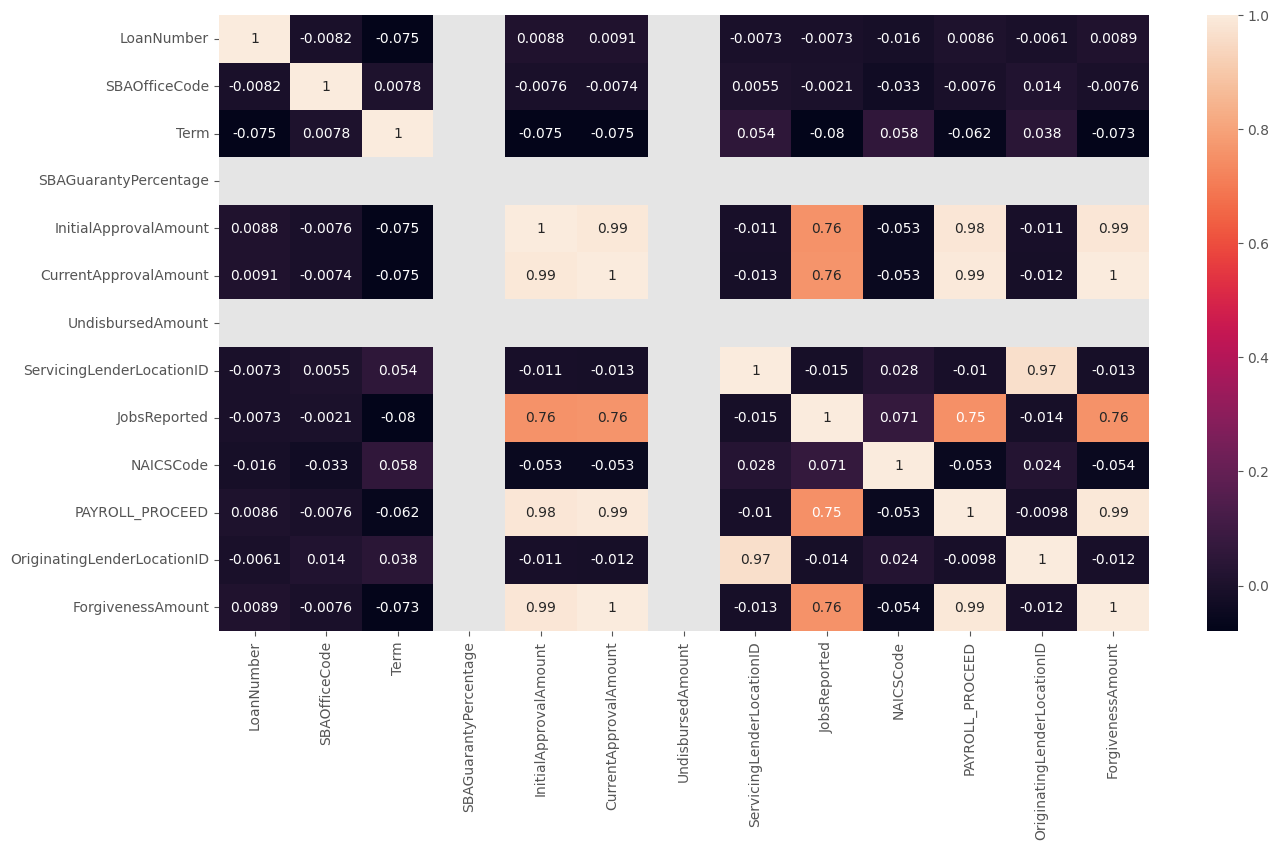

In [9]:
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)

In [10]:
#change scientific notation to decimal 2 number
pd.options.display.float_format = "{:,.2f}".format
aggegate_ini = df['InitialApprovalAmount'].agg(['mean','count','max','min'])
aggegate_cur = df['CurrentApprovalAmount'].agg(['mean','count','max','min'])
aggegate_jobs = df['JobsReported'].agg(['mean','count','max','min'])

print(aggegate_ini)

print("\n--------------------------------------------\n")

print(aggegate_cur)

print("\n--------------------------------------------\n")

print(aggegate_jobs)

mean       530,606.79
count      916,738.00
max     10,000,000.00
min              0.00
Name: InitialApprovalAmount, dtype: float64

--------------------------------------------

mean       528,933.92
count      916,738.00
max     10,000,000.00
min        150,000.00
Name: CurrentApprovalAmount, dtype: float64

--------------------------------------------

mean         51.77
count   916,738.00
max         500.00
min           0.00
Name: JobsReported, dtype: float64


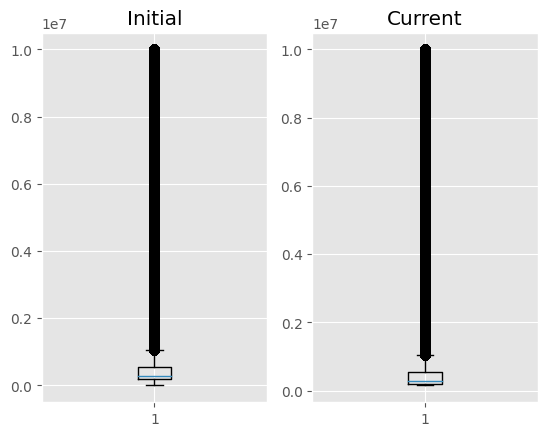

In [11]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()




In [12]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df = filter_outliner(df,'InitialApprovalAmount')
df = filter_outliner(df,'CurrentApprovalAmount')


In [13]:
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"879,666.00","879,666.00"
mean,"459,384.52","457,754.59"
std,"416,937.31","413,490.95"
min,"150,042.00","151,801.00"
25%,"203,500.00","203,200.00"
50%,"296,279.16","295,722.00"
75%,"524,737.00","523,459.50"
max,"3,719,750.00","2,589,201.00"


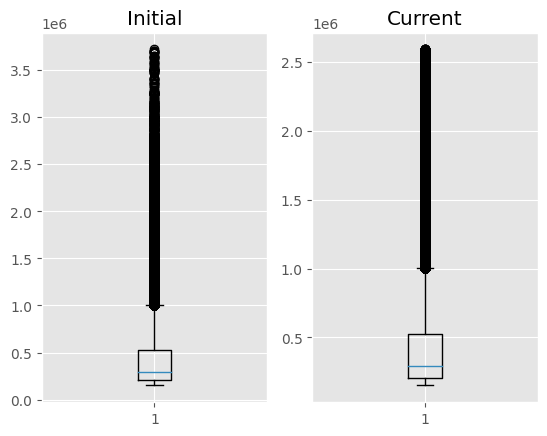

In [14]:
#boxplox looking for remove outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()



<AxesSubplot: xlabel='JobsReported'>

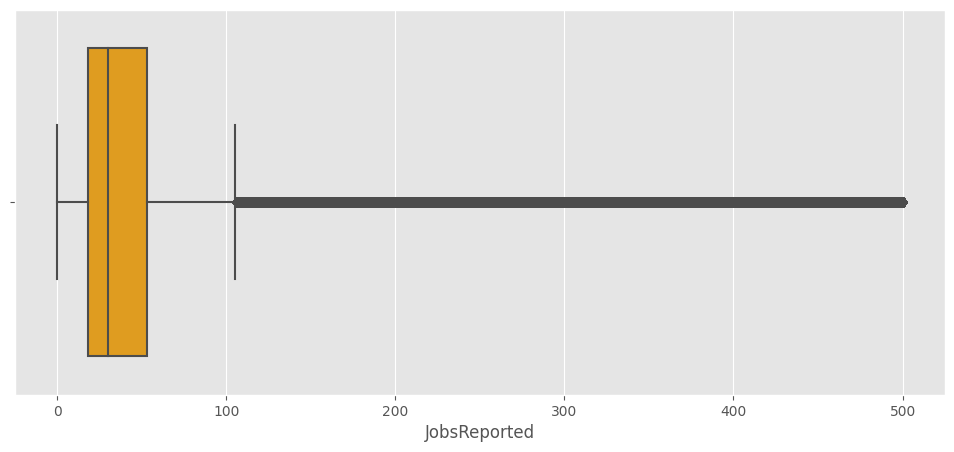

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x = 'JobsReported' , data= df ,color= 'orange')


In [16]:
#เพิ่ม column ช่วงของเงินที่ยืมไป
df['LoanRange'] = pd.cut(df['CurrentApprovalAmount'], 
                             bins = [0, 350000, 500000, 1000000, 2000000, float('inf')], 
                             labels = ['Less than 350K', '350K - 500K', '500K - 1m', '1m - 2m', 'More than 2m'])
df['LoanRange'].unique()

['More than 2m', '1m - 2m', '500K - 1m', '350K - 500K', 'Less than 350K']
Categories (5, object): ['Less than 350K' < '350K - 500K' < '500K - 1m' < '1m - 2m' < 'More than 2m']

<Figure size 1500x600 with 0 Axes>

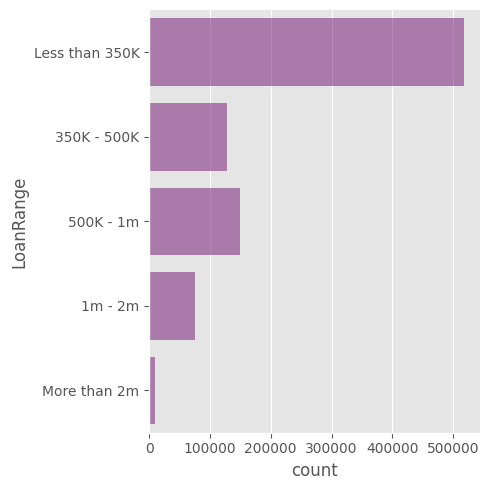

In [17]:
plt.figure(figsize = (15,6))
ax=sns.catplot(y='LoanRange', data=df ,kind= 'count' ,color = 'purple' ,alpha = 0.5)

In [18]:
# ดูว่าจำนวน ที่มีพนักงานมากที่สุด เป็น business type อะไร จำนวนเงินกู้อยู่ในช่วงไหน
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','LoanRange','BusinessType']].sort_values(by = 'JobsReported' , ascending=False).reset_index(drop = True)

df_column_fillter.head()

,BorrowerName,BorrowerCity,BorrowerState,JobsReported,LoanRange,BusinessType
0,SUMMIT SUBWAY LLC,COLORADO SPRINGS,CO,500.00,1m - 2m,Limited Liability Company(LLC)
1,MCKINNEY RESTAURANT I LLC,MAGNOLIA,TX,500.00,1m - 2m,Limited Liability Company(LLC)
2,WCD SERVICES CORP,MASPETH,NY,500.00,Less than 350K,Corporation
3,THE ARC OF CRAWFORD COUNTY INC,MEADVILLE,PA,500.00,1m - 2m,Non-Profit Organization
4,PUBLICK PIZZA CORP,BROOKLYN,NY,500.00,Less than 350K,Subchapter S Corporation


In [19]:
df_column_fillter.tail()

,BorrowerName,BorrowerCity,BorrowerState,JobsReported,LoanRange,BusinessType
879661,LEAL AND SPANGLER D.D.S. P.A.,WINSTON SALEM,NC,1.00,Less than 350K,Corporation
879662,WEEDEN CONSTRUCTION LLC,BANNER,WY,0.00,Less than 350K,Limited Liability Company(LLC)
879663,"RELIANT TRANSPORTATION, INC.",Lincoln,NE,0.00,500K - 1m,Corporation
879664,ST. MARGARET MARY SCHOOL,LOMITA,CA,0.00,Less than 350K,Non-Profit Organization
879665,VINCERA REHAB LLC,Philadelphia,PA,0.00,Less than 350K,Limited Liability Company(LLC)


##### Top 10 ของรัฐที่กู้เงินมากที่สุด


Text(0.5, 1.0, 'Top 10 State for PPP and PPS')

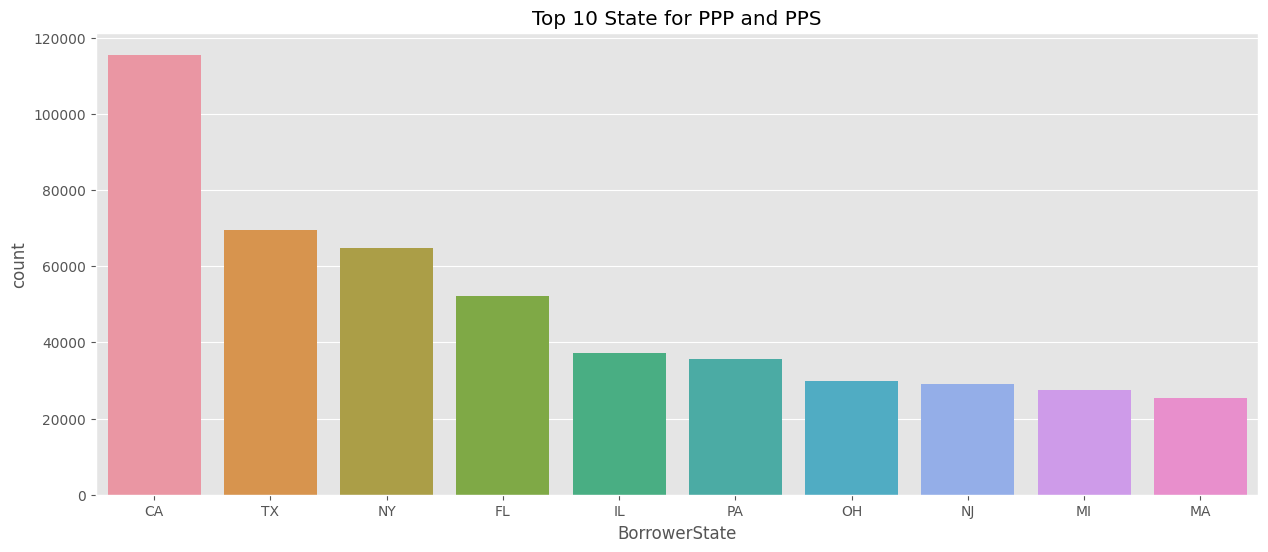

In [20]:
plt.figure(figsize = (15,6))
ax=sns.countplot(x="BorrowerState", data=df ,order = df['BorrowerState'].value_counts().index[:10], )
plt.title("Top 10 State for PPP and PPS")


สรุปได้ว่าที่เมือง CA = California มีจำนวนบริษัท ที่ใช้ บริการ PPP and PPS มากที่สุด

In [21]:
# ใน column มี ชื่อเหมือนกัน เช่น NEW YORK , NEW YORK
df['BorrowerCity'] = df['BorrowerCity'].str.upper()

# Q1 : ค่าเฉลี่ยของเงินที่ยืมไปในแต่ละพื้นที่ว่าในแต่ละรัฐ รัฐไหนยืมมากที่สุดเรียงตามลำดับ

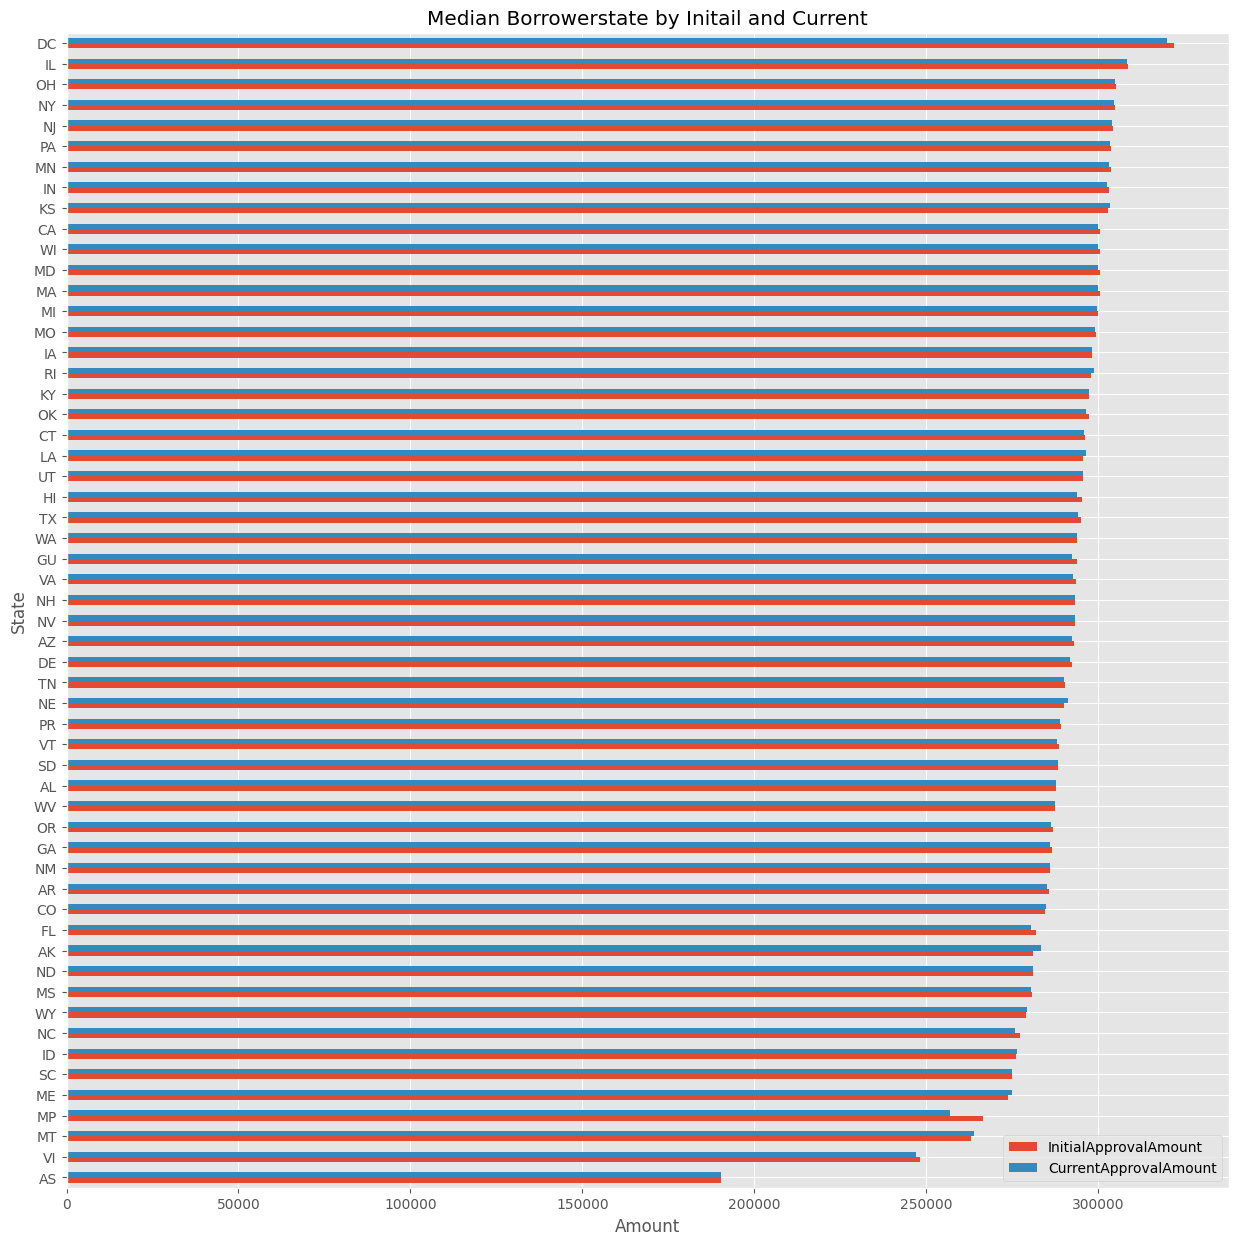

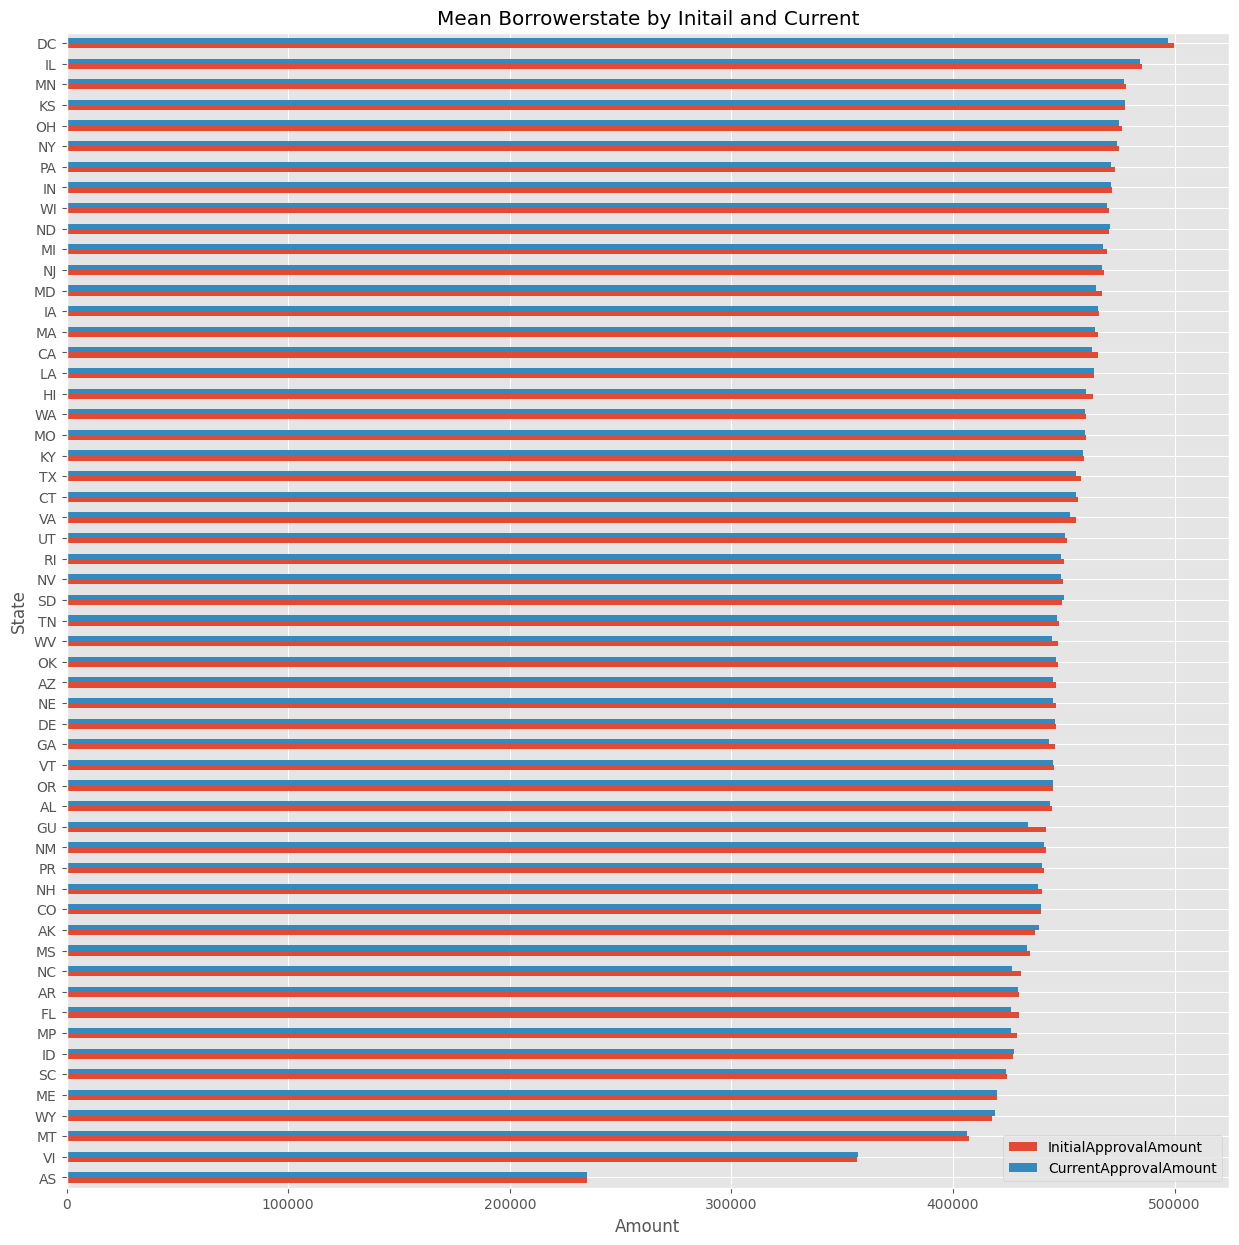

In [63]:
q_median = df.groupby("BorrowerState")['InitialApprovalAmount','CurrentApprovalAmount'].apply(lambda x : x.median()).sort_values(by = ["InitialApprovalAmount",'CurrentApprovalAmount'],ascending=True).plot(kind = 'barh' , figsize = (15,15)    )
plt.title('Median Borrowerstate by Initail and Current')
plt.ylabel('State')
plt.xlabel('Amount')
plt.show()

q_mean = df.groupby("BorrowerState")['InitialApprovalAmount','CurrentApprovalAmount'].apply(lambda x : x.mean()).sort_values(by = ["InitialApprovalAmount",'CurrentApprovalAmount'],ascending=True).plot(kind = 'barh' , figsize = (15,15)  )  
plt.title('Mean Borrowerstate by Initail and Current')
plt.ylabel('State')
plt.xlabel('Amount')
plt.show()
    

<AxesSubplot: xlabel='count', ylabel='OriginatingLender'>

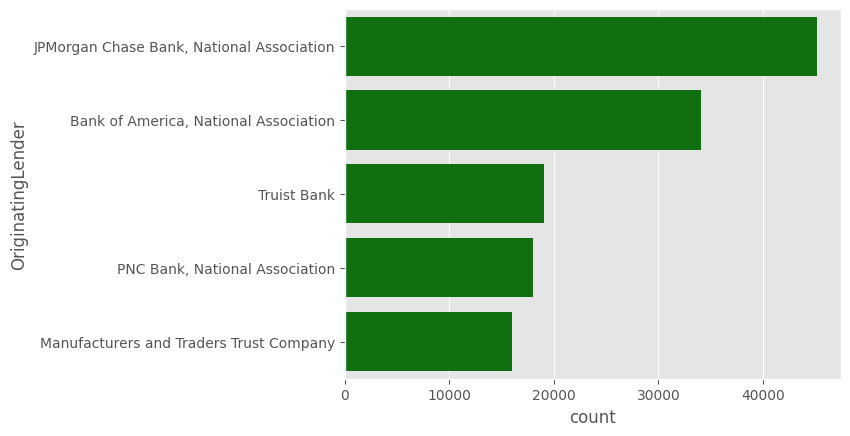

In [24]:
# Top 5 ธนาคารอะไรที่ให้กู้ยืมมากที่สุด
sns.countplot(data = df, y = 'OriginatingLender', order = df['OriginatingLender'].value_counts().index[:5], color = 'Green')

In [25]:
# filter ดูว่าบริษัทของเงินที่ยืมไปที่มีค่าเฉลี่ยอยู่ที่ใด
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount']]


df_column_AS = df.loc[df['BorrowerState'] == 'DC',['BorrowerName','BorrowerCity','BorrowerState','OriginatingLender','JobsReported','CurrentApprovalAmount']].sort_values('CurrentApprovalAmount' , ascending= False ).reset_index(drop=True)

df_column_AS.head()

,BorrowerName,BorrowerCity,BorrowerState,OriginatingLender,JobsReported,CurrentApprovalAmount
0,"TED'S BULLETIN HOLDINGS, LLC",WASHINGTON,DC,Sandy Spring Bank,475.00,"2,577,300.00"
1,AMERICAN UNIVERSITY D/B/A WAMU 88.5,WASHINGTON,DC,"Capital One, National Association",125.00,"2,571,532.00"
2,PREMIUM SELECT HOME CARE INC,WASHINGTON,DC,"Bank of America, National Association",485.00,"2,562,398.00"
3,UNIDOSUS,WASHINGTON,DC,"Fulton Bank, National Association",170.00,"2,550,000.00"
4,HOLLINGSWORTH LLP,WASHINGTON,DC,Manufacturers and Traders Trust Company,141.00,"2,547,100.00"


# Q2 ค่าเฉลี่ยของพนักงานในแต่ละรัฐ

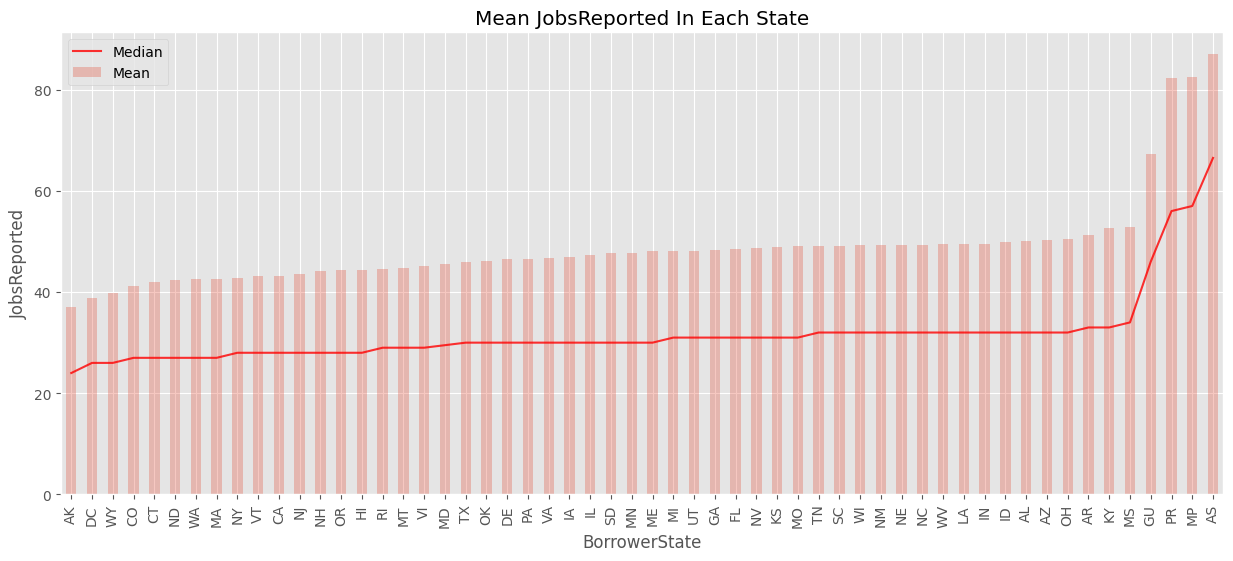

In [26]:

df.groupby("BorrowerState")['JobsReported'].mean().sort_values().plot(
    kind="bar",
    title = "Mean JobsReported  In Each State",
    alpha = 0.3,
    legend=True,
)

df.groupby("BorrowerState")["JobsReported"].median().sort_values().plot(
    kind="line",
    title = "Mean JobsReported In Each State",
    legend=True,
    color="red",
    rot=90,
    alpha=.8,
    figsize=(15,6) # Determines the size 
)
plt.ylabel("JobsReported") 
plt.legend(["Median", "Mean"]);

จาก กราฟ สรุปได้ว่า ใน รัฐ AS( American Samoa) มีจำนวนพนักงานเฉลี่ยมากที่สุด ถึงแม้ว่าจะมีประชากรน้อยก็ตาม 

[]

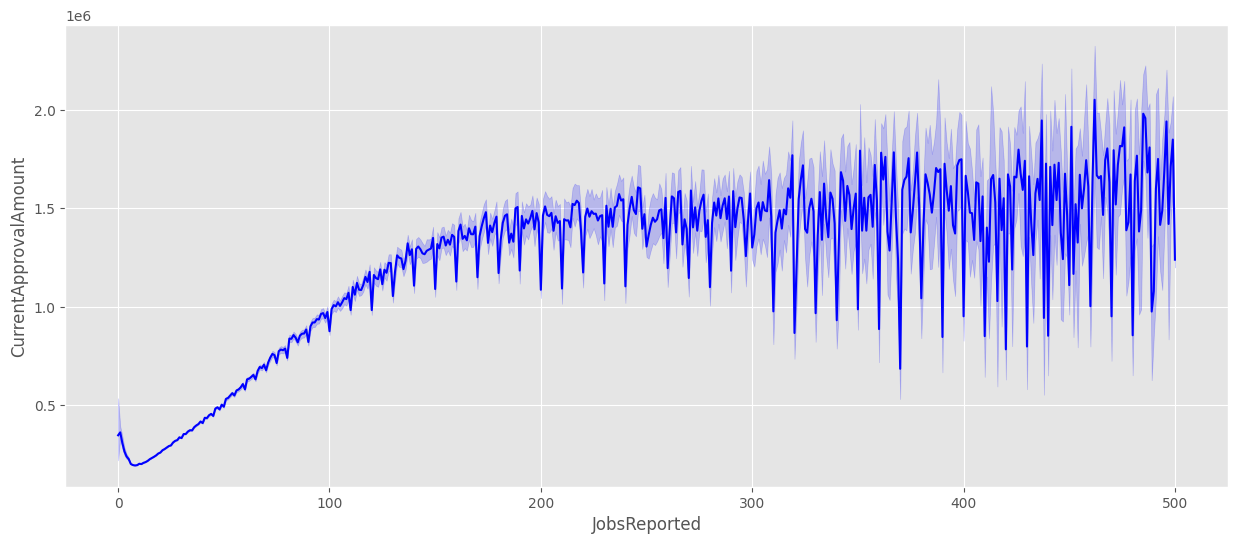

In [27]:
# line plot แสดงความสัมพันธ์ระหว่าง พนักงาน และ เงินที่กู้ยืมมา
plt.figure(figsize=(15,6))
sns.lineplot(x = "JobsReported" , 
             y = 'CurrentApprovalAmount' , 
             data= df , color = 'blue' ,
             )
plt.plot(xlabel='JobsReported')  
plt.plot(ylabel = 'ApprovalAmount')
plt.plot(title = 'Line graph interaction between JobsReported and ApprovalAmount')  

เรามา fitter ดุว่าเราทำอะไรกับ ความสัมพันธ์กับ พนักงาน (employees) กับ รัฐ (state)

In [28]:
# มาดูกันว่าในรัฐที่มีค่าเฉลี่ยมากที่สุดหน้าตาเป็นยังไง
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount']]
df_column_AS = df.loc[df['BorrowerState'] == 'AS',['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount']].sort_values('CurrentApprovalAmount' , ascending= False ).reset_index(drop=True)
df_column_AS.head(10)

,BorrowerName,BorrowerCity,BorrowerState,JobsReported,CurrentApprovalAmount
0,PARAMOUNT BUILDERS LIMITED,PAGO PAGO,AS,161.00,"500,000.00"
1,NANA'S INC,PAGO PAGO,AS,104.00,"394,622.00"
2,AMERICAN SAMOA 2000 INC,PAGO PAGO,AS,151.00,"389,500.00"
3,"PETER E REID STEVEDORING, INC.",PAGO PAGO,AS,116.00,"276,073.06"
4,FORSGREN LTD. INC,PAGO PAGO,AS,68.00,"256,332.00"
5,OTTOVILLE INVESTMENTS ONE INC,PAGOPAGO,AS,96.00,"248,525.00"
6,CONGREGATION CHRISTIAN CHURCH IN AMERICAN SAMOA,PAGO PAGO,AS,57.00,"218,720.00"
7,HARBOR MARITIME & STEVEDORING CO INC,PAGO PAGO,AS,145.00,"211,477.00"
8,G.H.C.REID,PAGO PAGO,AS,56.00,"196,639.32"
9,MANUMALO BAPTIST SCHOOL INC,PAGO PAGO,AS,68.00,"183,750.00"


In [29]:
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount','LMIIndicator','HubzoneIndicator','BusinessAgeDescription']]


df_column_fillter.head()

,BorrowerName,BorrowerCity,BorrowerState,JobsReported,CurrentApprovalAmount,LMIIndicator,HubzoneIndicator,BusinessAgeDescription
58,"BERING AIR, INC.",NOME,AK,184.00,"2,574,300.00",N,N,Unanswered
59,PND ENGINEERS INC,ANCHORAGE,AK,112.00,"2,489,263.00",Y,Y,Existing or more than 2 years old
60,"GRANT AVIATION, INC.",ANCHORAGE,AK,189.00,"2,487,000.00",N,N,Existing or more than 2 years old
61,DAVIS CONSTRUCTORS & ENGINEERS,ANCHORAGE,AK,78.00,"2,464,869.00",N,N,Unanswered
62,"JL PROPERTIES, INC",ANCHORAGE,AK,149.00,"2,335,261.81",N,N,Existing or more than 2 years old


N    648897
Y    230769
Name: LMIIndicator, dtype: int64


--------------------------------------



Text(0, 0.5, 'Count LMI')

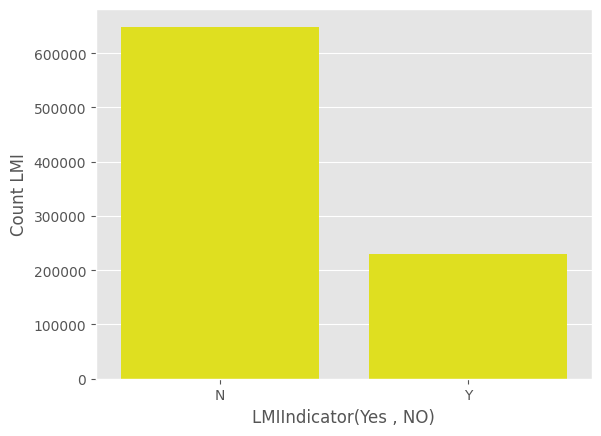

In [30]:
#LMI indicator คือ ซึ่งเป็นตัวบอกว่าผู้ขอกู้เงินมีรายได้ต่ำถึงปานกลางหรือไม่ โดย LMI Indicator เป็น N หมายถึงว่าผู้ขอกู้เงินไม่มีรายได้ต่ำถึงปานกลาง หรือไม่ได้รับการแสดงผลว่ามีรายได้ต่ำถึงปานกลางจากหน่วยงานที่เกี่ยวข้อง ซึ่งอาจเป็นบุคคลหรือกิจการที่มีรายได้สูงกว่ามาตรฐาน LMI ที่กำหนดไว้ตามกฎหมาย หรือไม่ตรงกับเกณฑ์ที่กำหนดในแต่ละประเทศหรือพื้นที่ดังกล่าว
df_count_LMI = df['LMIIndicator'].value_counts()
display(df_count_LMI)
print("\n--------------------------------------\n")

sns.countplot(data = df, 
              x = 'LMIIndicator', 
              order = df['LMIIndicator'].value_counts().index, 
              color = 'Yellow')

plt.xlabel('LMIIndicator(Yes , NO)')
plt.ylabel('Count LMI')


์Note : ดูจากกราฟจำนวนที่เป็น N มากกว่าที่ เป็น Y จึงสรุปได้ว่า ธูรกิจที่มีรายได้ต้่ากว่าปานกลางมีค่ามากกว่าธุรกิจที่มีรายได้สูง

# Q2 ค่าเฉลี่ยของพนักงานในแต่ละรัฐ

N    643352
Y    236314
Name: HubzoneIndicator, dtype: int64


--------------------------------------



Text(0.5, 1.0, 'HubzoneIndicator')

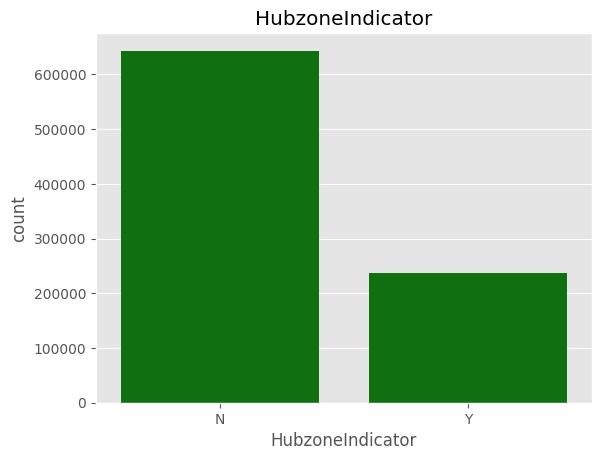

In [31]:
#Hubzone = เขตที่ไม่ค่อยได้ใช้ในอดีตที่มีความยากในการประกอบธุรกิจ
df_count_Hubzone = df['HubzoneIndicator'].value_counts()
display(df_count_Hubzone)
print("\n--------------------------------------\n")
sns.countplot(data = df, 
              x = 'HubzoneIndicator', 
              order = df['HubzoneIndicator'].value_counts().index, 
           
              color = 'Green')
plt.title('HubzoneIndicator')


In [32]:
filtered_df = df[(df['HubzoneIndicator'] == 'Y') ]

mean_approval_amount_hubzone = filtered_df['CurrentApprovalAmount'].median()

count_y_h = filtered_df.shape[0]

print(f"ค่าเฉลี่ย Approval Amount ของคนที่ทำธุรกิจในพื้นที่ Hubzone {mean_approval_amount_hubzone:.2f} $")
print(f"จำนวนคนที่ทำธุรกิจในพื้นที่ Hubzone คือ {count_y_h}")

ค่าเฉลี่ย Approval Amount ของคนที่ทำธุรกิจในพื้นที่ Hubzone 299400.00 $
จำนวนคนที่ทำธุรกิจในพื้นที่ Hubzone คือ 236314


In [33]:
filtered_df = df[ (df['LMIIndicator'] == 'Y')]

mean_approval_amount_lmi = filtered_df['CurrentApprovalAmount'].median()

count_y_l = filtered_df.shape[0]

print(f"ค่าเฉลี่ย Approval Amount ของคนที่ทำธุรกิจในพื้นที่ LMI คือ {mean_approval_amount_lmi:.2f} $")
print(f"จำนวนคนที่ทำธุรกิจในพื้นที่ LMI คือ {count_y_l}")

ค่าเฉลี่ย Approval Amount ของคนที่ทำธุรกิจในพื้นที่ LMI คือ 300502.00 $
จำนวนคนที่ทำธุรกิจในพื้นที่ LMI คือ 230769


In [34]:
filtered_df = df[(df['HubzoneIndicator'] == 'Y') & (df['LMIIndicator'] == 'Y')]

mean_approval_amount = filtered_df['CurrentApprovalAmount'].median()

count_y = filtered_df.shape[0]

print(f"ค่าเฉลี่ย Approval Amount ของคนที่ตอบ Y จาก Hubzone และ LMI คือ {mean_approval_amount:.2f} $")
print(f"จำนวนคนที่ทำธุรกิจในพื้นที่ Hubzone และ LMI คือ {count_y}")

ค่าเฉลี่ย Approval Amount ของคนที่ตอบ Y จาก Hubzone และ LMI คือ 301504.00 $
จำนวนคนที่ทำธุรกิจในพื้นที่ Hubzone และ LMI คือ 150147


Note : ผลสรุปเปรียบเทียบระหว่าง ธุรกิจที่รายได้ต่ำกว่าปานกลาง และ บริษัทที่กู้ที่อยู่ในพื่้นที่ Hubzone ไม่ต่างกัน

In [35]:
df.groupby(['BusinessAgeDescription', 'LMIIndicator']).size().reset_index(name='count')

,BusinessAgeDescription,LMIIndicator,count
0,Change of Ownership,N,281
1,Change of Ownership,Y,101
2,Existing or more than 2 years old,N,581250
3,Existing or more than 2 years old,Y,206219
4,New Business or 2 years or less,N,34487
5,New Business or 2 years or less,Y,12508
6,"Startup, Loan Funds will Open Business",N,189
7,"Startup, Loan Funds will Open Business",Y,66
8,Unanswered,N,32690
9,Unanswered,Y,11875


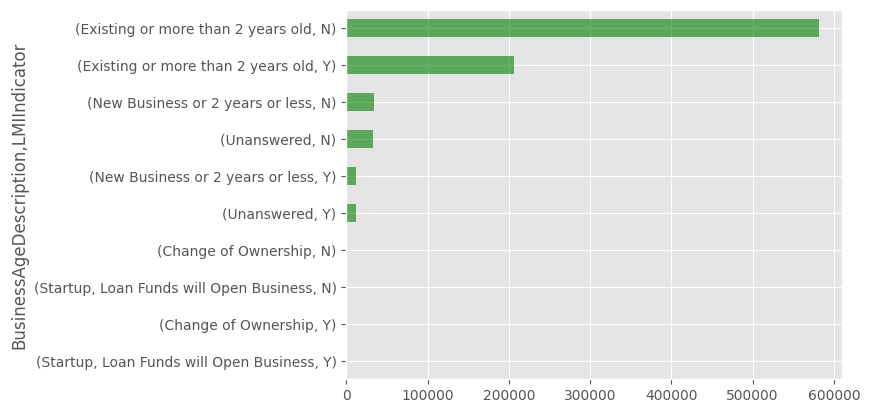

In [36]:
f_fittered = df.groupby(['BusinessAgeDescription', 'LMIIndicator'])['BusinessAgeDescription'].apply(lambda x : x.count()).sort_values(ascending=True).plot(kind = 'barh',color = 'Green' , alpha = 0.6 )




Note : สรุปได้ว่า ส่วนใหญ่จำนวนของธุรกิจที่มีอยู่แล้วหรือมากกว่า 2 ปี และ มี IMI indicator มีผลเป็น N ที่บอกว่าไม่ใช่เป็นบริษัทรายได้ต่ำกว่าปานกลาง 

<AxesSubplot: xlabel='count', ylabel='BusinessType'>

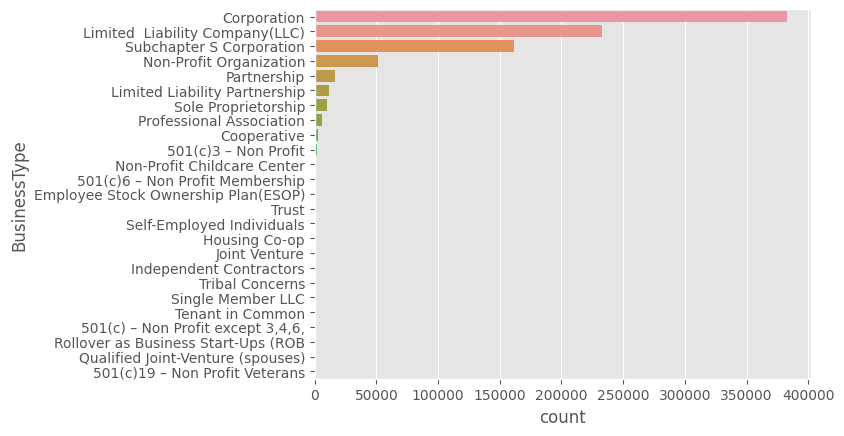

In [37]:
sns.countplot(data = df, y = 'BusinessType', order = df['BusinessType'].value_counts().index)

Note : มีแค่ business เพียงแค่ 4 ชนิดเท่านั้นที่เราสามารถนำมาใช้ได้

In [38]:
# หาว่าเป็นเวลาไหนบ้างที่มีการยืมมากที่สุด
ppp_business_df = df[df['BusinessType'].isin(['Corporation', 'Limited  Liability Company(LLC)','Subchapter S Corporation', 'Non-Profit Organization'])]

ppp_business_df = ppp_business_df.sort_values(['DateApproved']).reset_index(drop = True)


ppp_biz_count_df = ppp_business_df.groupby(['DateApproved', 'BusinessType']).count().groupby(level = -1).cumsum().reset_index()

ppp_biz_sum_df = ppp_business_df.groupby(['DateApproved', 'BusinessType']).sum().reset_index()

# Filter Column DateApproved ซึ่งเป็นเวลา
เราจะสามารถหาว่าในแต่ละปีมีคนกู้มากน้อยแค่ไหน

In [22]:
# change datatype of date to datetime 
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# check the format column
df.head(10)['DateApproved']

58   2020-04-13
59   2020-04-05
60   2020-04-06
61   2020-04-12
62   2020-04-08
63   2020-05-01
64   2020-04-09
65   2020-04-11
66   2020-04-08
67   2020-05-06
Name: DateApproved, dtype: datetime64[ns]

<AxesSubplot: title={'center': 'Number of businesses approved for PPP loan by year and LMI Indicator'}, xlabel='Year', ylabel='Count'>

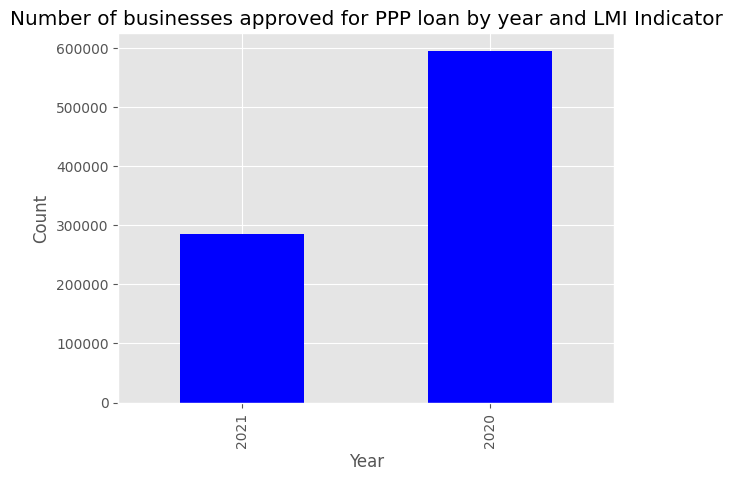

In [39]:
df['year'] = df['DateApproved'].dt.year
df_grouped = df.groupby(['year'])['CurrentApprovalAmount'].apply(lambda x : x.count()).sort_values()

df_grouped.plot(kind = 'bar', 
                color = 'blue' ,
                title= 'Number of businesses approved for PPP loan by year and LMI Indicator',
                xlabel= 'Year',
                ylabel= 'Count',
                )





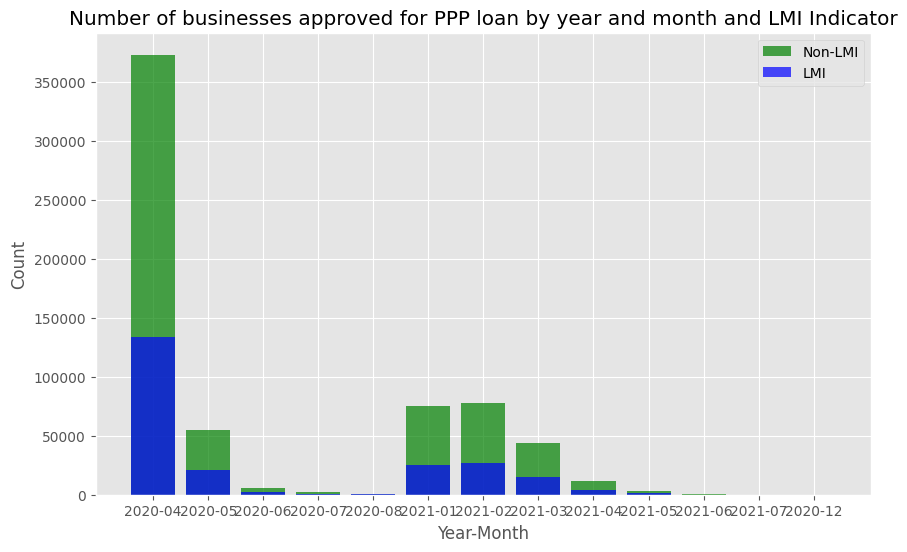

In [40]:
#เราอาจจะไม่เห็นอะไรจากข้างบน เราลองมาแบ่งเป็น %Y-%M บ้าง 
df['year_month'] = df['DateApproved'].dt.strftime('%Y-%m')

df_grouped = df.groupby(['year_month', 'LMIIndicator']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
plt.bar(df_grouped[df_grouped['LMIIndicator'] == 'N']['year_month'], df_grouped[df_grouped['LMIIndicator'] == 'N']['count'], color='green', alpha=0.7 )
plt.bar(df_grouped[df_grouped['LMIIndicator'] == 'Y']['year_month'], df_grouped[df_grouped['LMIIndicator'] == 'Y']['count'], color='blue', alpha=0.7)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Number of businesses approved for PPP loan by year and month and LMI Indicator')
plt.legend(['Non-LMI', 'LMI'], loc='upper right')
plt.show()

Note : 1. จำนวนธุรกิจที่ No LMI จะมีมากกว่าจำนวนธุรกิจที่มี LMI Indicator โดยมีสัดส่วนประมาณ 60 : 40  
       2.ความถี่ของแต่ละ category สามารถแสดงได้ด้วยความสูงของแท่งในกราฟ ซึ่งแท่งสีฟ้าแสดงจำนวนธุรกิจที่ No LMI และแท่งสีส้มแสดงจำนวนธุรกิจที่ Yes LMI

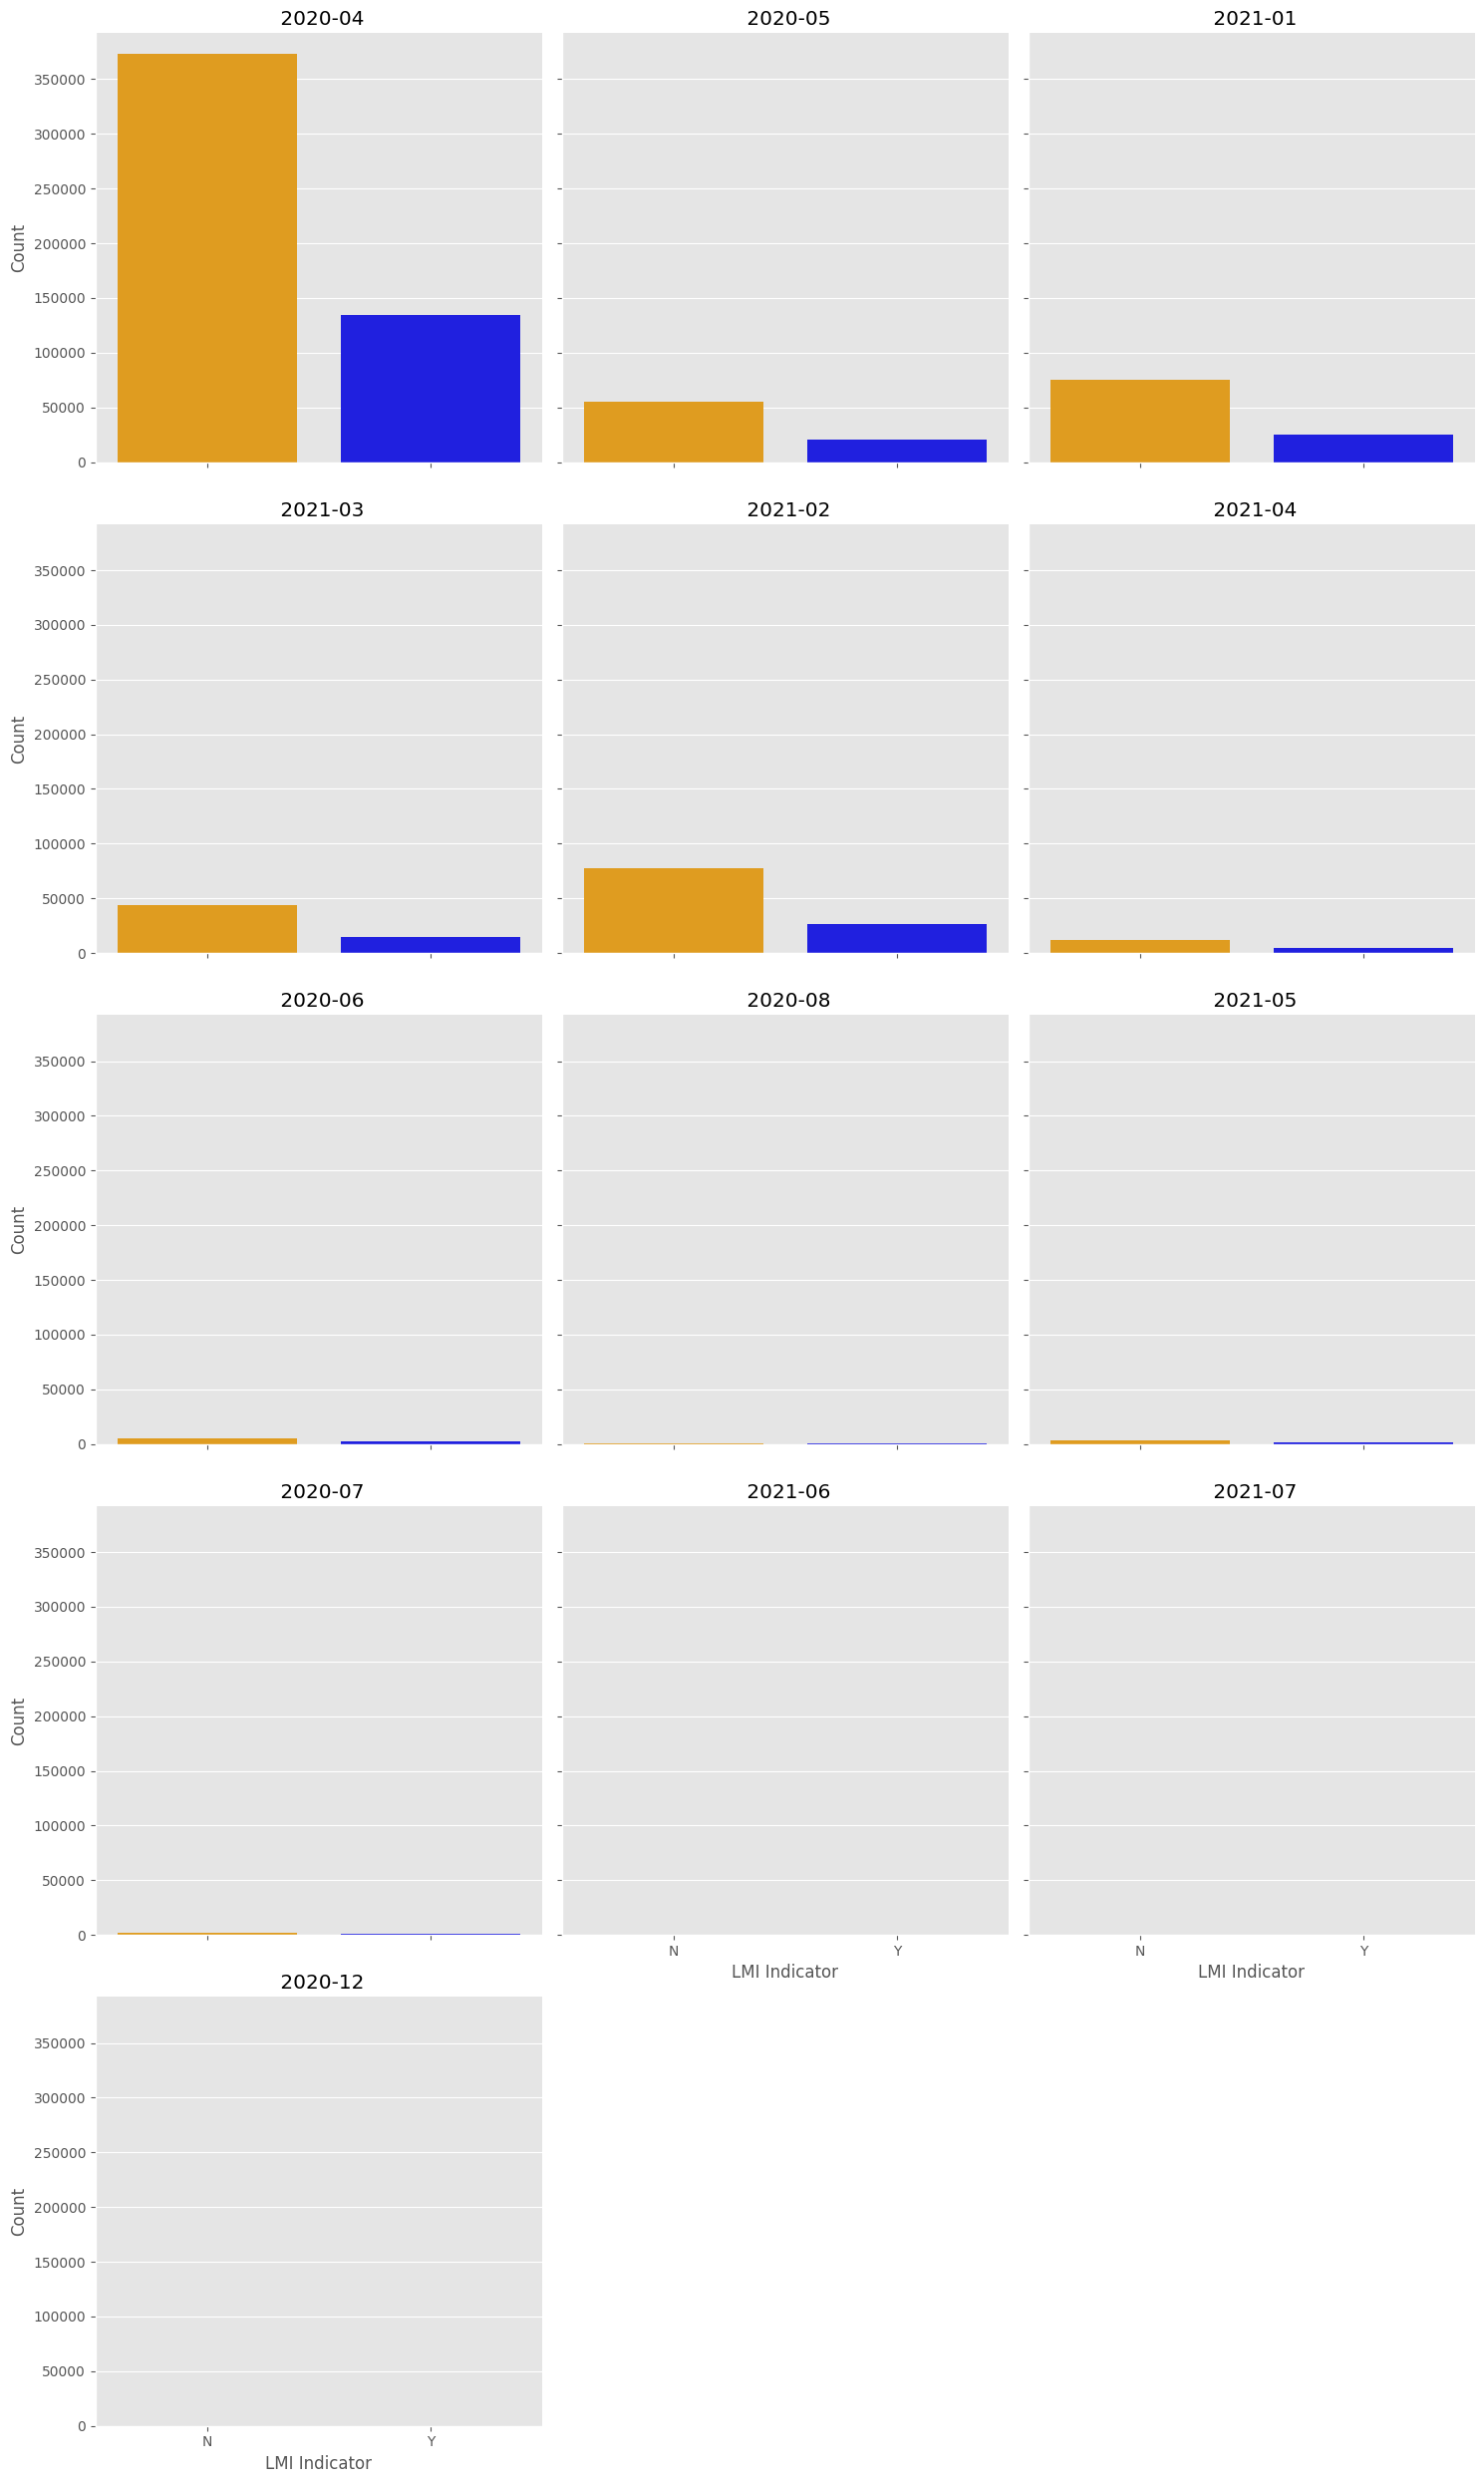

In [41]:
# ทำเพื่อให้ดูง่ายขึ้น
g = sns.catplot(data=df, x='LMIIndicator', col='year_month', kind='count', col_wrap=3, palette=['orange', 'blue'])

# กำหนดชื่อแต่ละ subplot
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[-1])

# กำหนดชื่อแกน x และ y
g.set_axis_labels(x_var='LMI Indicator', y_var='Count')

Note : 
1. จากกราฟแสดงให้เห็นว่าการแบ่งกราฟตามปีและแสดงจำนวนธุรกิจที่มีและไม่มี LMI Indicator ในแต่ละปี จะเห็นได้ว่าจำนวนธุรกิจที่ไม่มี LMI Indicator มีมากกว่าจำนวนธุรกิจที่มี LMI Indicator โดยทั่วไป ซึ่งสามารถอธิบายได้ว่ากิจการที่ไม่มี LMI Indicator มีฐานะทางการเงินที่แข็งแกร่งกว่ากิจการที่มี LMI Indicator อยู่บ้าง 
2. จากกราฟจะเห็นได้ว่าในปี 2021 มีจำนวนการยืมน้อยลงเมื่อเทียบกับ ปี 2020 อาจจะเป็นสัญญาณในการฟื้นตัวของธุรกิจที่เป็นผลของโควิด-19 ทำให้ไม่ต้องการเงินสนับสนุนจาก โครงการ Paycheck Protection Program อีกต่อไป

Action plan :
1. ศึกษาและวิเคราะห์เพิ่มเติมเกี่ยวกับสาเหตุและผลกระทบของการแบ่งแยกตาม LMI Indicator และพัฒนานโยบายเพื่อเปิดโอกาสให้กับธุรกิจที่มี LMI Indicator เป็น Y ที่มีฐานะทางการเงินที่แข็งแกร่งเท่ากับกิจการที่ LMI Indicator เป็น N
2. พัฒนาแผนกลยุทธ์ในการสนับสนุนธุรกิจให้มีความหลากหลายและเหมาะสมกับธุรกิจที่มีความต้องการแตกต่างกัน


In [42]:
# มาดูกันว่าในเดือน 2020-04 มีอะไรน่าสนใจบ้าง
sub_set_column = ['DateApproved','BorrowerName','BorrowerCity','BorrowerState','CurrentApprovalAmount','JobsReported','LMIIndicator','HubzoneIndicator','BusinessAgeDescription']
df_date_2020_04 = df.loc[df['DateApproved'] < '2020-04-30',sub_set_column].sort_values(['DateApproved','CurrentApprovalAmount'] , ascending= False) 


df_date_2020_04.head()

,DateApproved,BorrowerName,BorrowerCity,BorrowerState,CurrentApprovalAmount,JobsReported,LMIIndicator,HubzoneIndicator,BusinessAgeDescription
19761,2020-04-29,"UNITED GENERAL BAKERY, INC",PHOENIX,AZ,"2,586,700.00",392.00,Y,Y,Existing or more than 2 years old
398943,2020-04-29,LAWRENCE-LYNCH CORP.,FALMOUTH,MA,"2,583,300.00",150.00,N,Y,Existing or more than 2 years old
498870,2020-04-29,INTERNATIONAL FOOD PRODUCTS CORPORATION,FENTON,MO,"2,582,965.00",180.00,N,N,Unanswered
449667,2020-04-29,ACCURATE GAUGE & MANUFACTURING,ROCHESTER,MI,"2,581,800.00",180.00,Y,Y,Existing or more than 2 years old
166233,2020-04-29,"READY MIXED CONCRETE COMPANY, LLC",DENVER,CO,"2,578,900.00",153.00,Y,Y,Existing or more than 2 years old


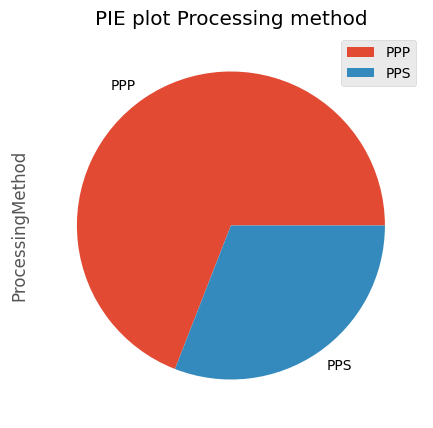

In [43]:
# Loan Delivery Method (PPP กู้ครั้งแรก ; PPS กู้ครั้งที่ 2)
PPS_PPE_count = df['ProcessingMethod'].value_counts().plot(kind = 'pie' ,
                                                           figsize=(5,5),
                                                           title= 'PIE plot Processing method')

plt.legend()
plt.show()

Text(0.5, 1.0, 'Count Businees Urban or Rural')

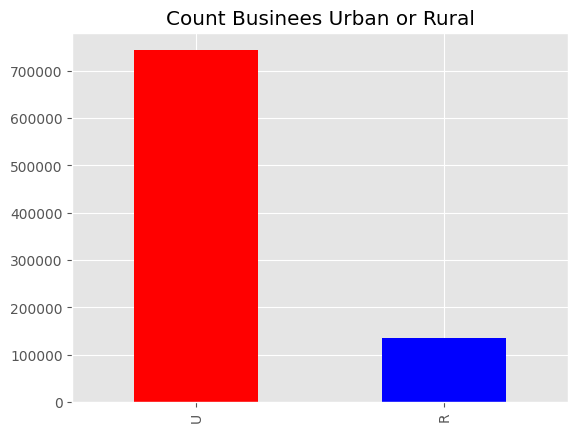

In [51]:
df['RuralUrbanIndicator'].value_counts().plot(kind= 'bar' , 
                                              color = ['red','blue'])

plt.title('Count Businees Urban or Rural')


Text(0.5, 1.0, 'Count Businees Urban or Rural and LMIIndicator')

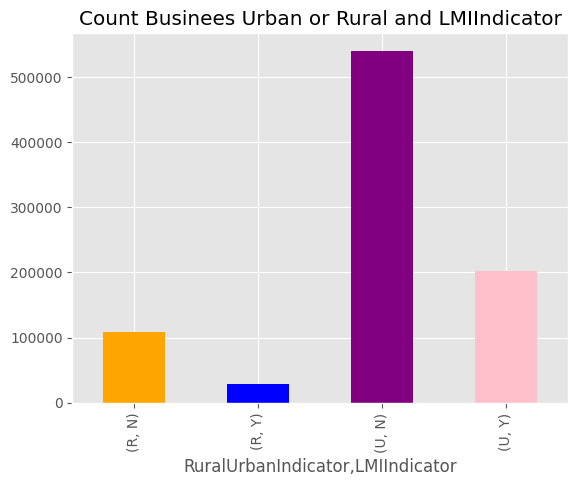

In [56]:
df.groupby('RuralUrbanIndicator')['LMIIndicator'].value_counts().plot(kind = 'bar' ,
                                                                      color = ['orange','blue','purple','pink'] )
plt.title('Count Businees Urban or Rural and LMIIndicator')

Text(0.5, 1.0, 'Count Businees Urban or Rural and HubzoneIndicator')

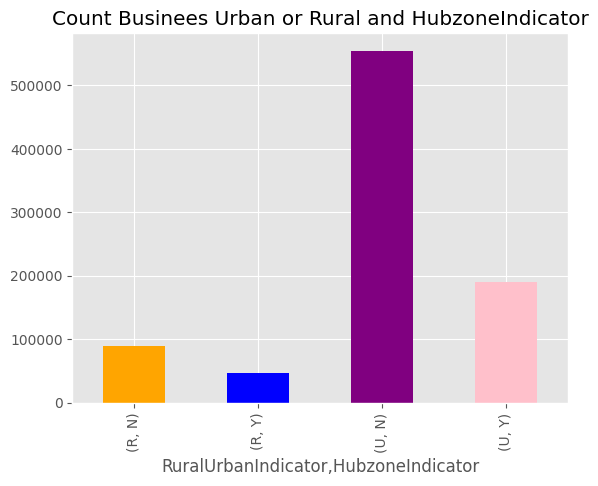

In [59]:
df.groupby('RuralUrbanIndicator')['HubzoneIndicator'].value_counts().plot(kind = 'bar' ,
                                                                      color = ['orange','blue','purple','pink'] )
plt.title('Count Businees Urban or Rural and HubzoneIndicator')